In [1]:
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
from skimage.transform import rescale

In [2]:
def plot_image(image, title):
    pylab.imshow(image)
    pylab.title(title, size=20)
    pylab.axis('off')

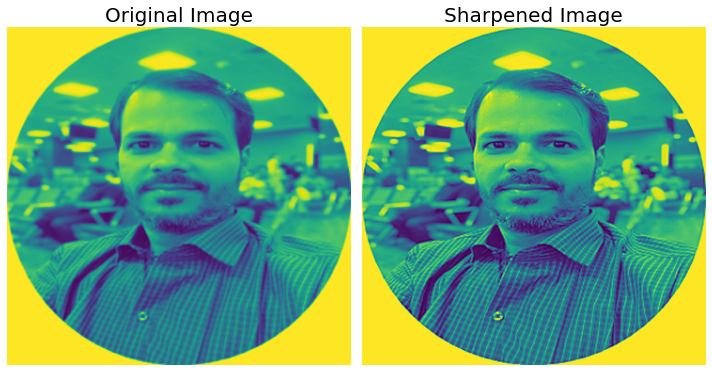

In [3]:
from skimage.filters import laplace
im=rgb2gray(imread('images/rajesh.png'))
im1=np.clip(laplace(im)+im,0,1)
pylab.figure(figsize=(10,15))
pylab.subplot(121), plot_image(im, 'Original Image')
pylab.subplot(122), plot_image(im1,'Sharpened Image')
pylab.tight_layout()
pylab.show()

<Figure size 432x288 with 0 Axes>

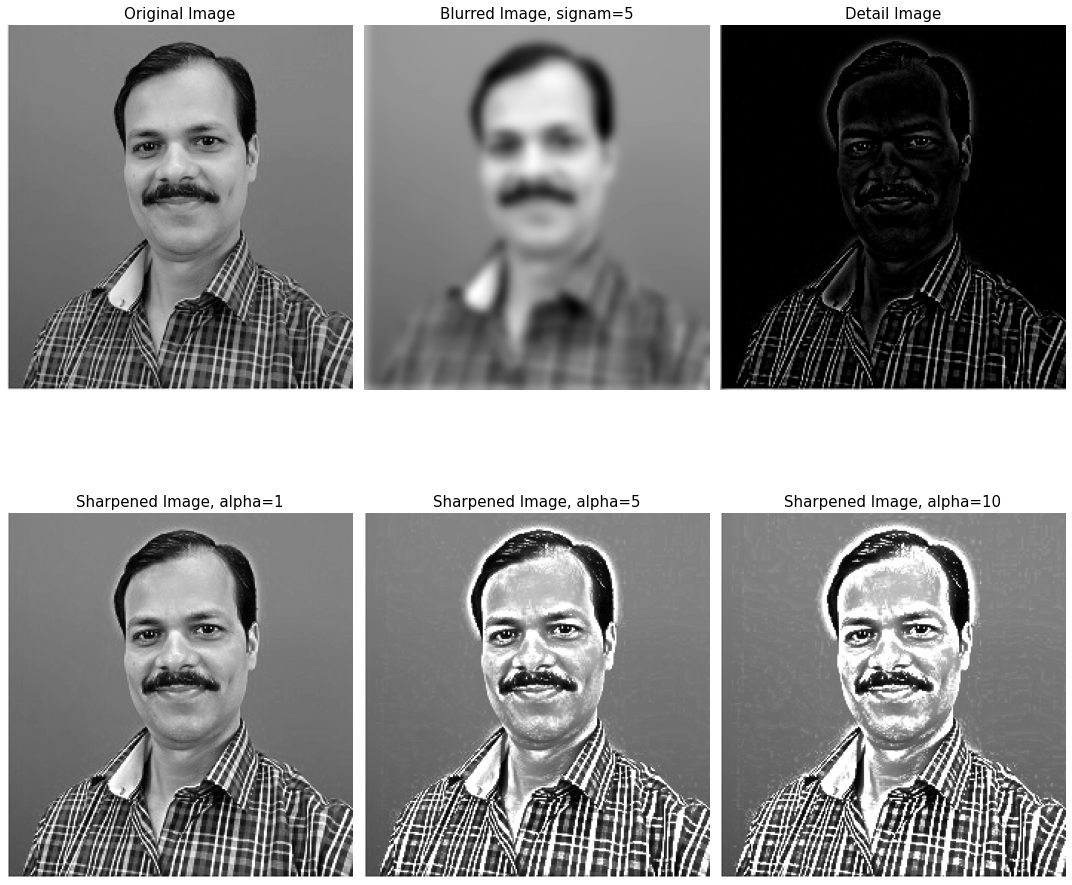

In [4]:
def rgb2gray(im):
    
    
    
    return np.clip(0.2989*im[...,0]+0.5870*im[...,1]+0.1140*im[...,2],0,1)
im=rgb2gray(img_as_float(imread('images/rkm.jpg')))
im_blurred=ndimage.gaussian_filter(im,3)
im_detail=np.clip(im-im_blurred,0,1)
pylab.gray()
fig, axes=pylab.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,15))
axes=axes.ravel()
axes[0].set_title('Original Image',size=15), axes[0].imshow(im)
axes[1].set_title('Blurred Image, signam=5', size=15), axes[1].imshow(im_blurred)
axes[2].set_title('Detail Image', size=15), axes[2].imshow(im_detail)
alpha=[1, 5, 10]
for i in range(3):
    im_sharp=np.clip(im+alpha[i]*im_detail,0,1)
    axes[3+i].imshow(im_sharp)
    axes[3+i].set_title('Sharpened Image, alpha='+str(alpha[i]),size=15)
for ax in axes:
    ax.axis('off')
fig.tight_layout()
pylab.show()

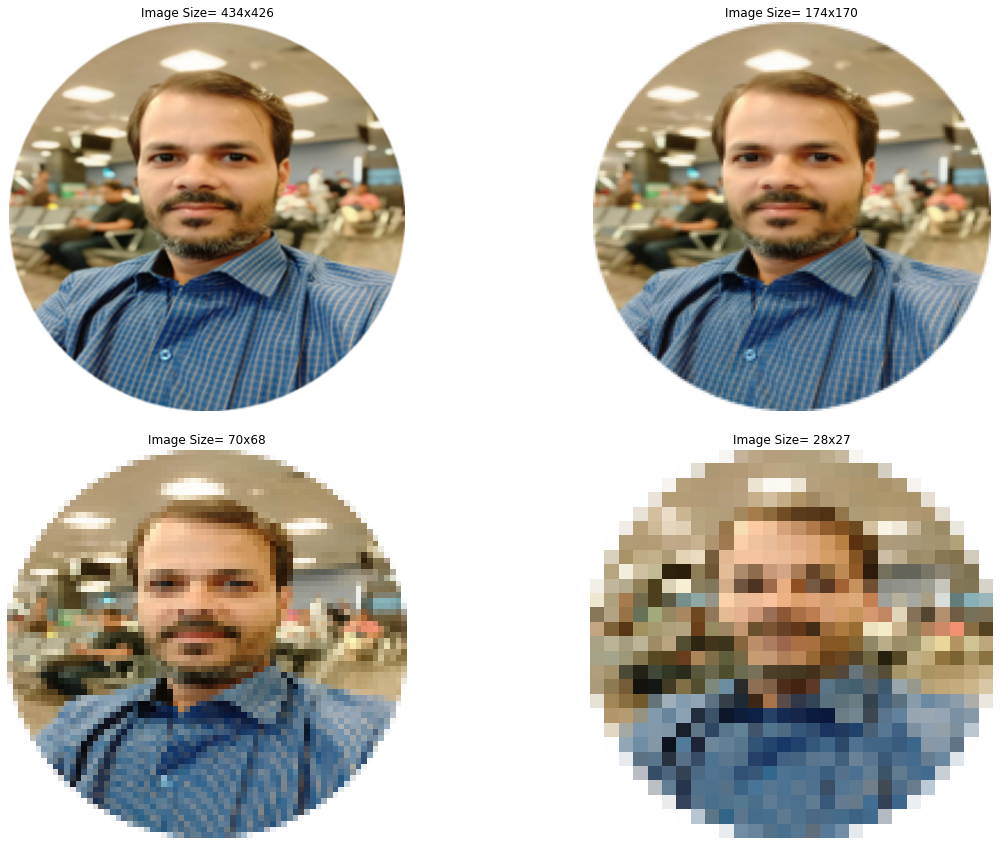

In [5]:
im=imread('images/rajesh.png')
im1=im.copy()
pylab.figure(figsize=(20,15))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1,cmap='gray'), pylab.axis('off')
    pylab.title('Image Size= '+str(im1.shape[1])+'x'+str(im1.shape[0]))
    im1=rescale(im1,scale=0.4, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()